# **Supervised vs Unsupervised learning**

Imagine you have a bunch of pictures of animals, and you want to build a system that can identify what animal is in each picture.

**Supervised Learning:**

Think of this as learning with a teacher or a supervisor. In supervised learning, your data comes with "labels" or correct answers.

Example: You have pictures of cats and dogs, and each picture is already labeled as either "cat" or "dog."
How it works: You feed the system the pictures and their labels. The system learns by trying to figure out the patterns that distinguish cats from dogs based on the examples you provide. It's like giving a child flashcards with pictures and telling them "This is a cat" and "This is a dog" until they learn to identify them on their own.
Goal: To predict the label for new, unseen data. So, when you show it a new picture, it should be able to tell you if it's a cat or a dog.
Common tasks: Classification (like identifying cats vs. dogs) and Regression (like predicting house prices based on features).

**Unsupervised Learning:**

This is like learning without a teacher. In unsupervised learning, your data does not have labels.

Example: You have a bunch of pictures of different animals, but you don't have any labels telling you which animal is which.
How it works: You feed the system the pictures, and it tries to find patterns and structure in the data on its own. It might group similar pictures together. For instance, it might put all the cat pictures in one group, all the dog pictures in another, and all the bird pictures in a third group, without ever being told what a "cat," "dog," or "bird" is. It just sees similarities and differences.
Goal: To discover hidden patterns, structures, or relationships within the data. It's about exploration and finding insights you might not have known were there.
Common tasks: Clustering (like grouping similar pictures together, as in our example), Dimensionality Reduction (simplifying data while keeping important information), and Association Rule Mining (finding relationships between items, like "people who buy bread often buy milk").
Here's a simple analogy:

**Supervised Learning:** Learning your ABCs by having a teacher tell you "This is A," "This is B," etc.

**Unsupervised Learning:** Being given a box of LEGOs of different shapes and colors and figuring out on your own how to group them by shape or color.
In summary:

**Supervised Learning:** Uses labeled data to predict outcomes. It's like learning with answers provided.

**Unsupervised Learning:** Uses unlabeled data to find patterns and structure. It's like exploring data to find hidden insights.
Both are powerful tools in machine learning, but they are used for different types of problems depending on whether you have labeled data or not.

supervised vs unsupervised.avif


Importing the Library



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# DATASET DOWNLOAD LINK
*Reading* the Sample CSV file. You can download the file from here:

https://drive.google.com/file/d/1jAUMdcBmkOfl27ad-m-J-FT75cZY3yIs/view?usp=drive_link

Dowload and upload it into the google colab environment and share the path inside the pd.read_csv("paste the path here") parameter

In [ ]:
#Reading the Sample CSV file
df = pd.read_csv("/content/sample_data/CSE 422 Lab 5 Mockup Data.csv")
df_copy = df.copy()

In [ ]:
df.columns

Index(['ID', 'Hours Studied per day', 'Hours Slept per day'], dtype='object')

In [ ]:
df.head(5)

,ID,Hours Studied per day,Hours Slept per day
0,1,10.0,4.1
1,2,1.3,8.2
2,3,2.4,7.5
3,4,4.0,8.0
4,5,5.0,6.0


# ***Plotting the data for visualization***

/tmp/ipython-input-1604556603.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


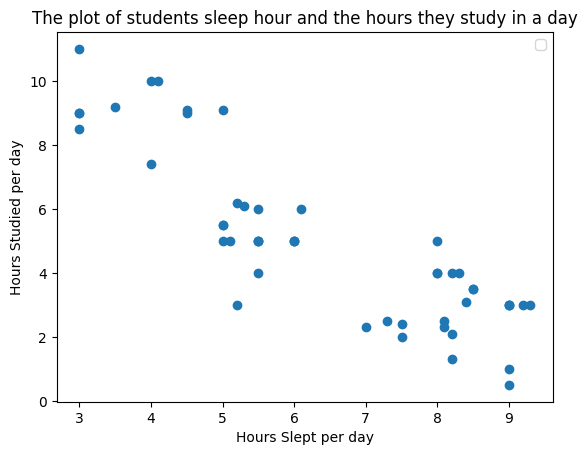

In [ ]:
##plot the data
plt.ylabel('Hours Studied per day')
plt.xlabel("Hours Slept per day")
plt.scatter(df["Hours Slept per day"],df["Hours Studied per day"])
plt.title("The plot of students sleep hour and the hours they study in a day")
plt.legend()
plt.show()

# Dataset Description
The dataset we are using basically represents the number of hours students are sleeping per day vs the number of hours they study per day During a Mid week. This is a mockup dataset created to demonstrate the algorithm

A snipppet of the dataset looks like this:

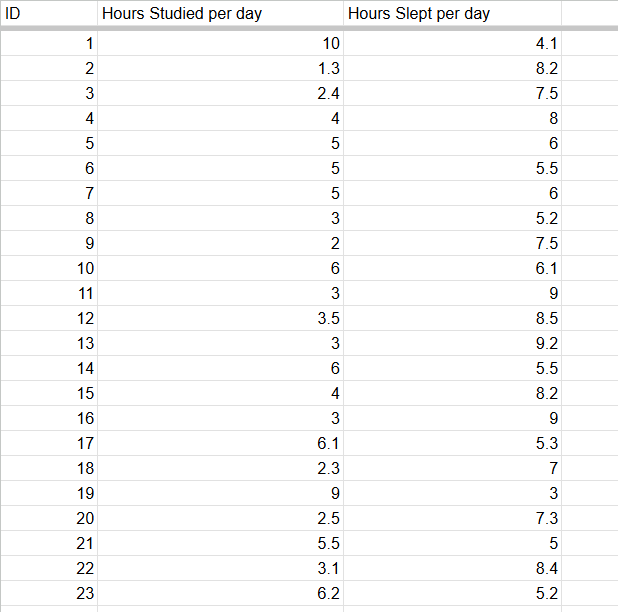

# **Introduction to K-Means Clustering**
K-means clustering is an unsupervised machine learning algorithm that groups data into K clusters by assigning each point to the nearest cluster center (centroid) and updating the centroids until they stabilize.

# **K-Means Clustering Visual demonstration**
For this explanation, consider we have a dataset with 2 features and there are no labels to identify. In a 2D plot, the data looks like this:
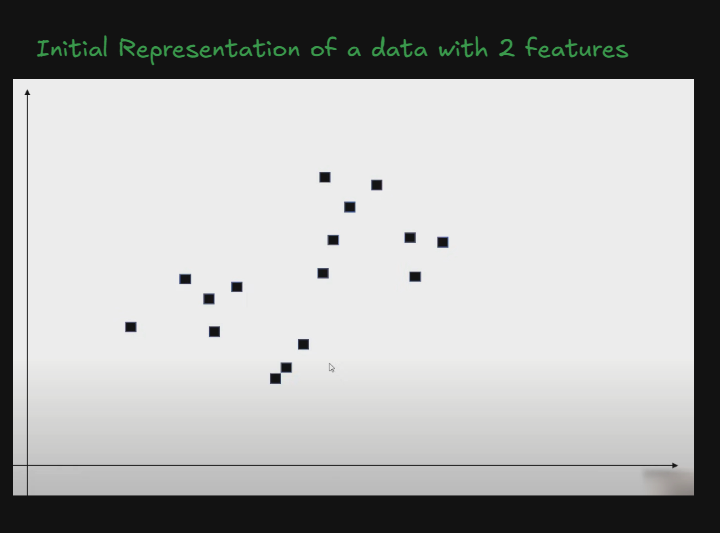

Consider the K value of the KMC is 2. Meaning we are trying to assign data into 2 clusters.
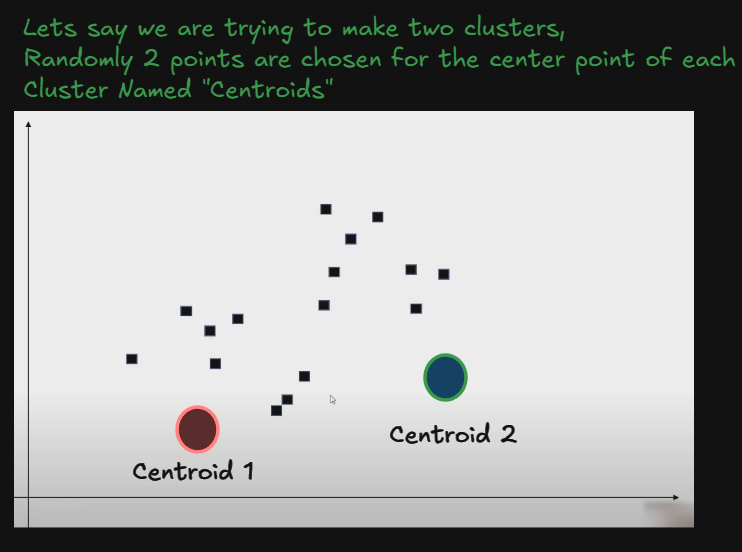

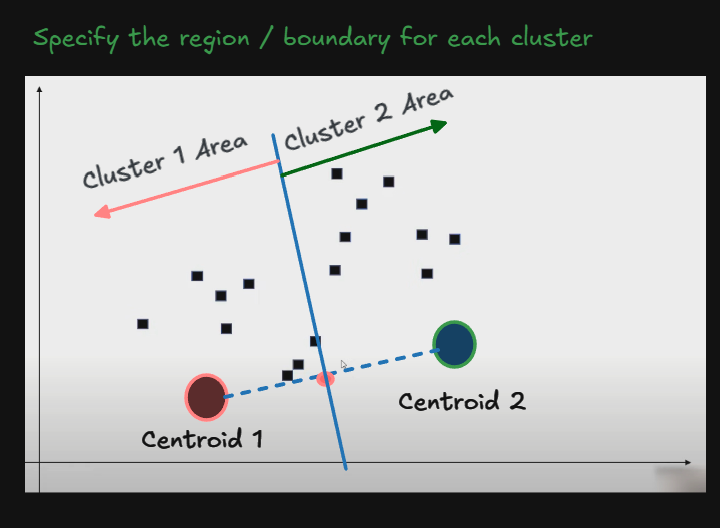

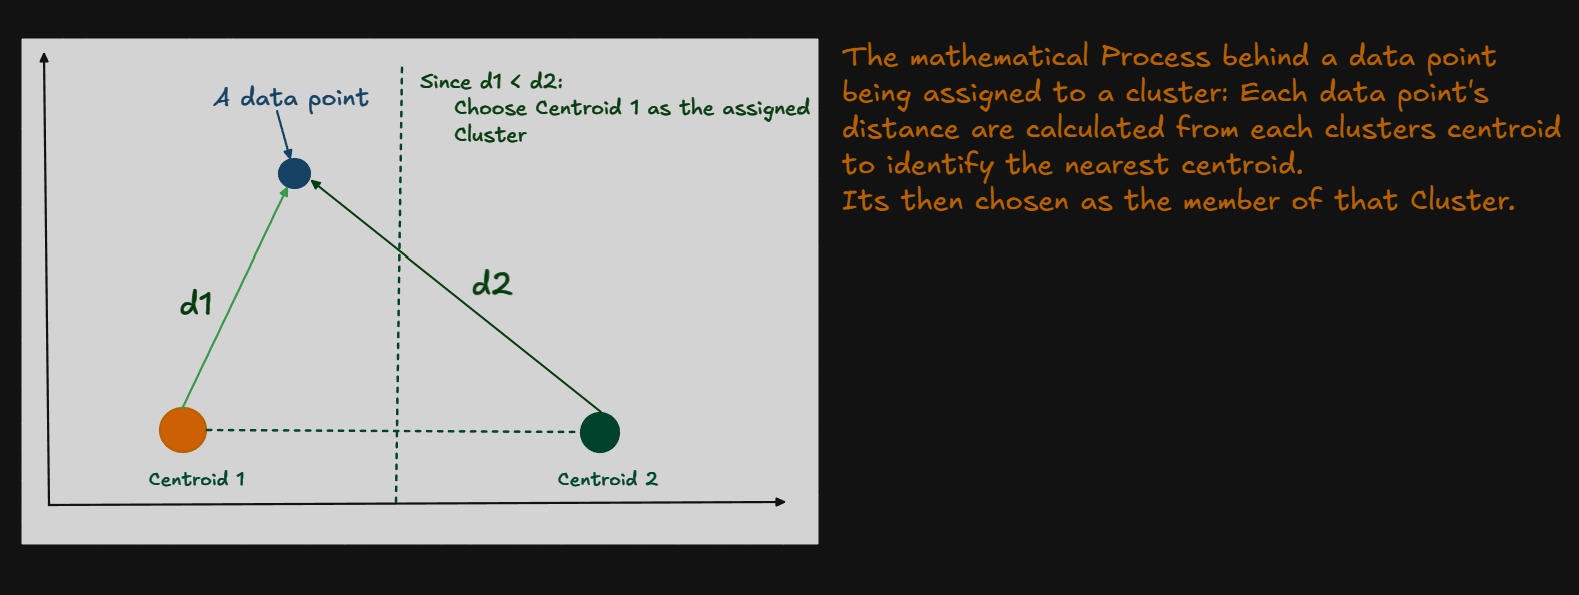

The distance calculation varies depending on problem formulation. In this case, consider we are using Euclidian Disstance to measure d1 and d2.

After all the distances are calculated for every data point from each centroid, the clusters look like this.
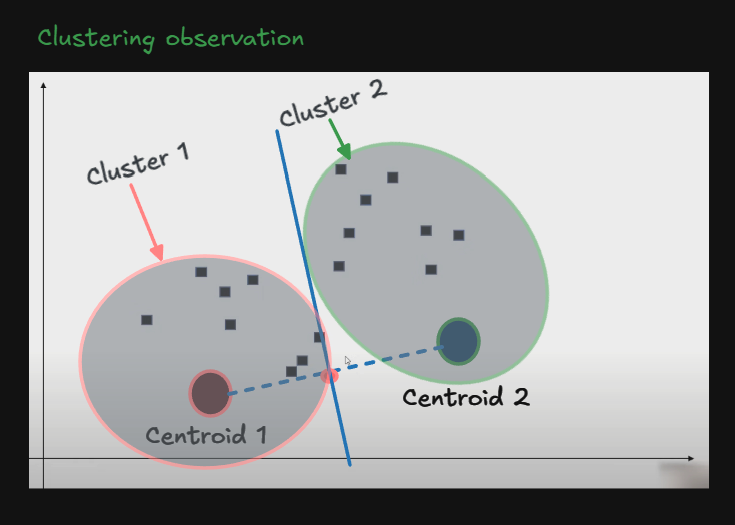

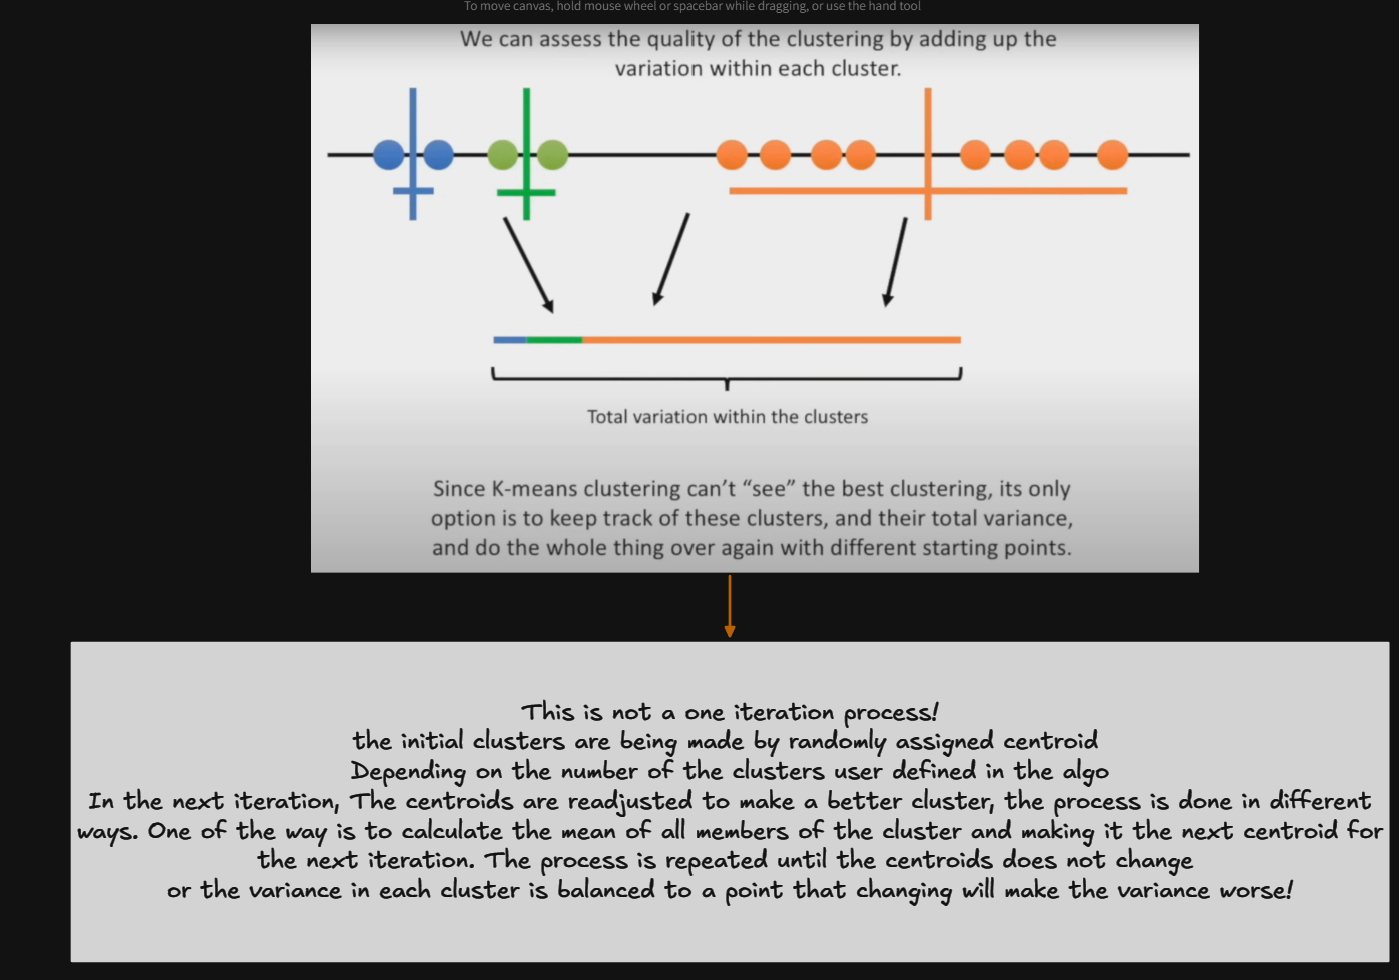

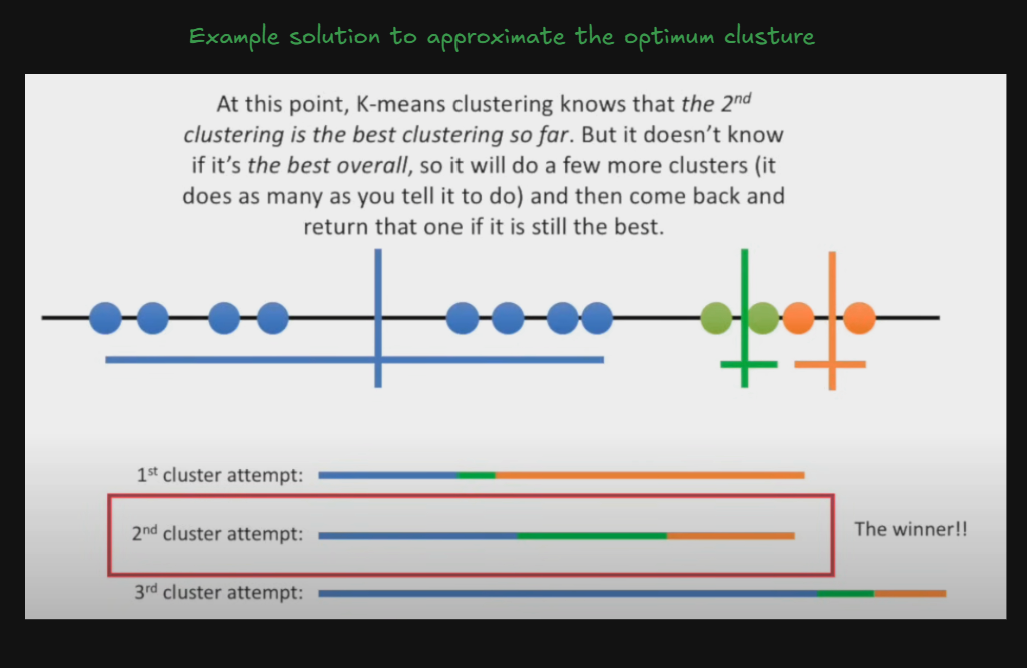

# ***K Means Cluster Implementation***
The parameters of KMeans() :
class sklearn.cluster.KMeans(n_clusters=8, *, init='k-means++', n_init='auto', max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='lloyd')
documentation link: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html


In [ ]:
#implementing K means Clustering in this dataframe
#change the parameters inside the model creation to experiment with the result
def implement_KMC(df_temp,cluster_num):
  km = KMeans(n_clusters=cluster_num)  #defining the cluster number
  y_predicted = km.fit_predict(df_temp[['Hours Slept per day','Hours Studied per day']])
  return km,y_predicted #returns the model and the predicted assigned cluster to each entry

In [ ]:
#Running the method
cluster = 3
km,y_predicted = implement_KMC(df,cluster)  ##stores the model and the predicted values
df["Group_cluster"]=y_predicted
df.head(10)

KMC running


,ID,Hours Studied per day,Hours Slept per day,Group_cluster
0,1,10.0,4.1,1
1,2,1.3,8.2,2
2,3,2.4,7.5,2
3,4,4.0,8.0,2
4,5,5.0,6.0,0
5,6,5.0,5.5,0
6,7,5.0,6.0,0
7,8,3.0,5.2,0
8,9,2.0,7.5,2
9,10,6.0,6.1,0


# ***Plotting the clusters with color encoding, each cluster has its own centroid***

In [ ]:
#Plot the 3 clusters with different color from the prediciton value
def plot_cluster(km,df,cluster_num):  ##takes parameter: saved model, dataframe, number of clusters to visualize, note it has a limit of max 6 in this code
  if cluster_num>6:
    print("Cluster number should be less than 6, make your own plot method to fit more")
    return
  color = ['green', 'red', 'blue', 'purple', 'black', 'yellow']
  for i in range(cluster_num):
    plt.scatter(df[df.Group_cluster==i]['Hours Slept per day'],df[df.Group_cluster==i]['Hours Studied per day'],color=color[i])
    plt.scatter(km.cluster_centers_[i,0],km.cluster_centers_[i,1],color=color[i],s=200,marker='X',label=f'centroid {i+1}')
    plt.xlabel('Hours Slept per day')
    plt.ylabel('Hours Studied per day')
    plt.legend()

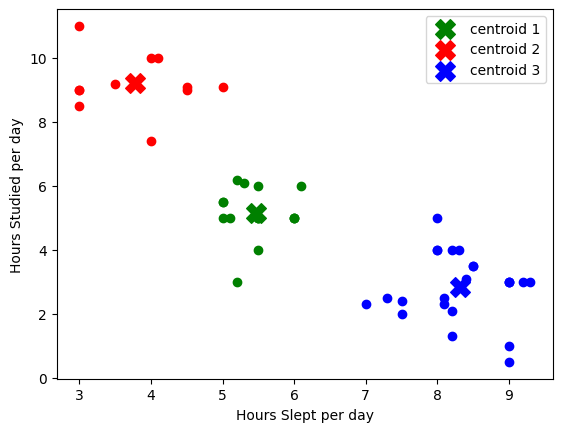

In [ ]:
plot_cluster(km,df,cluster)

We can observe:


*   Cluster Red [cluster =1]: Students are studying way more while haivng a litle sleep
*   Cluster Green [cluster = 0]: They have a balanced life

*   Cluster Blue [cluster =2]: They are chilling !







In [ ]:
#mapping their behavior pattern to give them a categorization and adding it into the dataframe

label_map = {2: 'Chiller', 0: 'Balanced', 1: 'Nerd'}
df['Label'] = df['Group_cluster'].map(label_map)
display(df.head(10))

,ID,Hours Studied per day,Hours Slept per day,Group_cluster,Label
0,1,10.0,4.1,1,Nerd
1,2,1.3,8.2,2,Chiller
2,3,2.4,7.5,2,Chiller
3,4,4.0,8.0,2,Chiller
4,5,5.0,6.0,0,Balanced
5,6,5.0,5.5,0,Balanced
6,7,5.0,6.0,0,Balanced
7,8,3.0,5.2,0,Balanced
8,9,2.0,7.5,2,Chiller
9,10,6.0,6.1,0,Balanced


In [ ]:
df['Label'].value_counts()

,count
Label,
Chiller,23
Balanced,16
Nerd,11


# **K-Means Clustering using IRIS dataset**

***To continue with the last lab, lets implement the same thing on the IRIS dataset of the previous lab***



*   For Simplicity, we will choose 2 features to do the task so that we can visualize it better in the plot as it will be 2D
*   Keep in mind, we already know the original distribution of each group, so we can compare the predicted distribution to understand if we are making good clustering or not



In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
X = df[['sepal length (cm)', 'sepal width (cm)']]

def implement_KMC1(cluster_num):
  km = KMeans(n_clusters=cluster_num,random_state=42, n_init=10)  #defining the cluster number and other parameters
  y_predicted = km.fit_predict(df[['sepal length (cm)', 'sepal width (cm)']])
  return km,y_predicted

In [ ]:
def plot_cluster1(km,df,cluster_num):  ##takes parameter: saved model, dataframe, number of clusters to visualize, note it has a limit of max 6 in this code
  if cluster_num>6:
    print("Cluster number should be less than 6, make your own plot method to fit more")
    return
  color = ['green', 'red', 'blue', 'purple', 'black', 'yellow']
  for i in range(cluster_num):
    plt.scatter(df[df.Group_clutter==i]['sepal length (cm)'],df[df.Group_clutter==i]['sepal width (cm)'],color=color[i])
    plt.scatter(km.cluster_centers_[i,0],km.cluster_centers_[i,1],color=color[i],s=200,marker='X',label=f'centroid {i+1}')
    plt.xlabel('sepal length (cm)')
    plt.ylabel('sepal width (cm)')
    plt.legend()

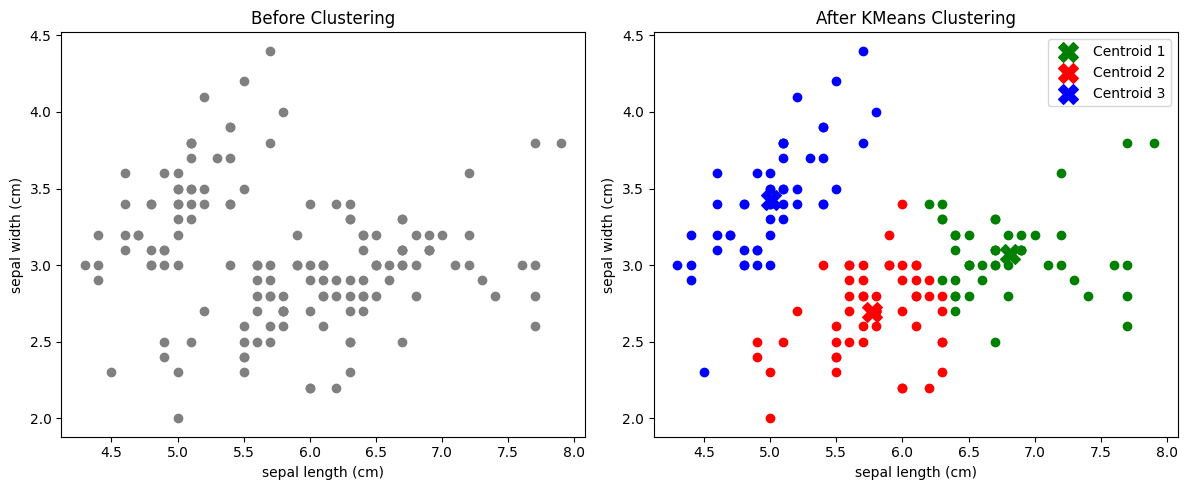

In [ ]:
cluster = 3
km1, y_predicted = implement_KMC1(cluster)
df['Group_clutter'] = y_predicted

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot before clustering
axs[0].scatter(df['sepal length (cm)'], df['sepal width (cm)'], color='gray')
axs[0].set_title("Before Clustering")
axs[0].set_xlabel('sepal length (cm)')
axs[0].set_ylabel('sepal width (cm)')

# Plot after clustering
color = ['green', 'red', 'blue', 'purple', 'black', 'yellow']
for i in range(cluster):
    axs[1].scatter(df[df.Group_clutter == i]['sepal length (cm)'],
                   df[df.Group_clutter == i]['sepal width (cm)'],
                   color=color[i])
    axs[1].scatter(km1.cluster_centers_[i, 0],
                   km1.cluster_centers_[i, 1],
                   color=color[i], s=200, marker='X', label=f'Centroid {i+1}')

axs[1].set_title("After KMeans Clustering")
axs[1].set_xlabel('sepal length (cm)')
axs[1].set_ylabel('sepal width (cm)')
axs[1].legend()

plt.tight_layout()
plt.show()

***Comparing original labels of the iris which was divided equally into 3 groups and the cluttered groups generated by our algorithm. Its very convenient for us since we already know the exact number of groups needed for this particular dataset but that wont be the case everytime***

In [ ]:
print("Original Distribution of the Group\n")
df['target'].value_counts()

Original Distribution of the Group



,count
target,
0,50
1,50
2,50


In [ ]:
print("Predicted Group Clutter Distribution:\n")
df['Group_clutter'].value_counts()

Predicted Group Clutter Distribution:



,count
Group_clutter,
1,53
2,50
0,47


# Elbow Method: Finding the Appropriate Number of Cluster
In an uncontrolled environment working with real life data where the features are greater in dimensions and more complex to make cluster group, Understanding the appropriate number of clusters is an imporant analysis.

In order to approach this, we use a method Called Elbow Method. The steps are:
* At first, Calculate the mean distance of a member of the cluster and the centroid to measure how close each data point is to its cluster centroid. Its Named **SSE [Sum of Squared Errors (also called inertia)]**

* We use variable number of Clusters [K value] and generate the SSE value for each iteration. And its plotted and used to find the optimum value of K.

In [ ]:
k_range = range(1,10)
SSE = []
for k in k_range:
  km = KMeans(n_clusters= k)
  km.fit(df_copy[['Hours Slept per day','Hours Studied per day']])   #using the first mockup dataset
  SSE.append(km.inertia_)
SSE ##this is the inertia value record after each iteration, its decreasing


[536.849,
 181.5348701298701,
 58.959720849802366,
 53.468534161490695,
 39.4947142857143,
 30.063065476190484,
 26.552079365079372,
 23.05611904761905,
 17.636645021645016]

***Plotting the K values vs SSE curve***


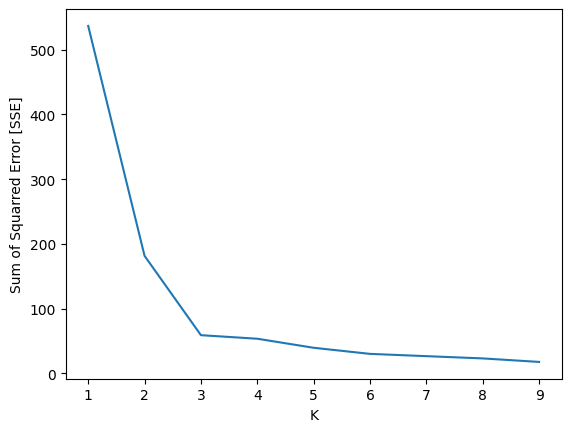

In [ ]:
plt.xlabel("K")
plt.ylabel("Sum of Squarred Error [SSE]")
plt.plot(k_range,SSE)

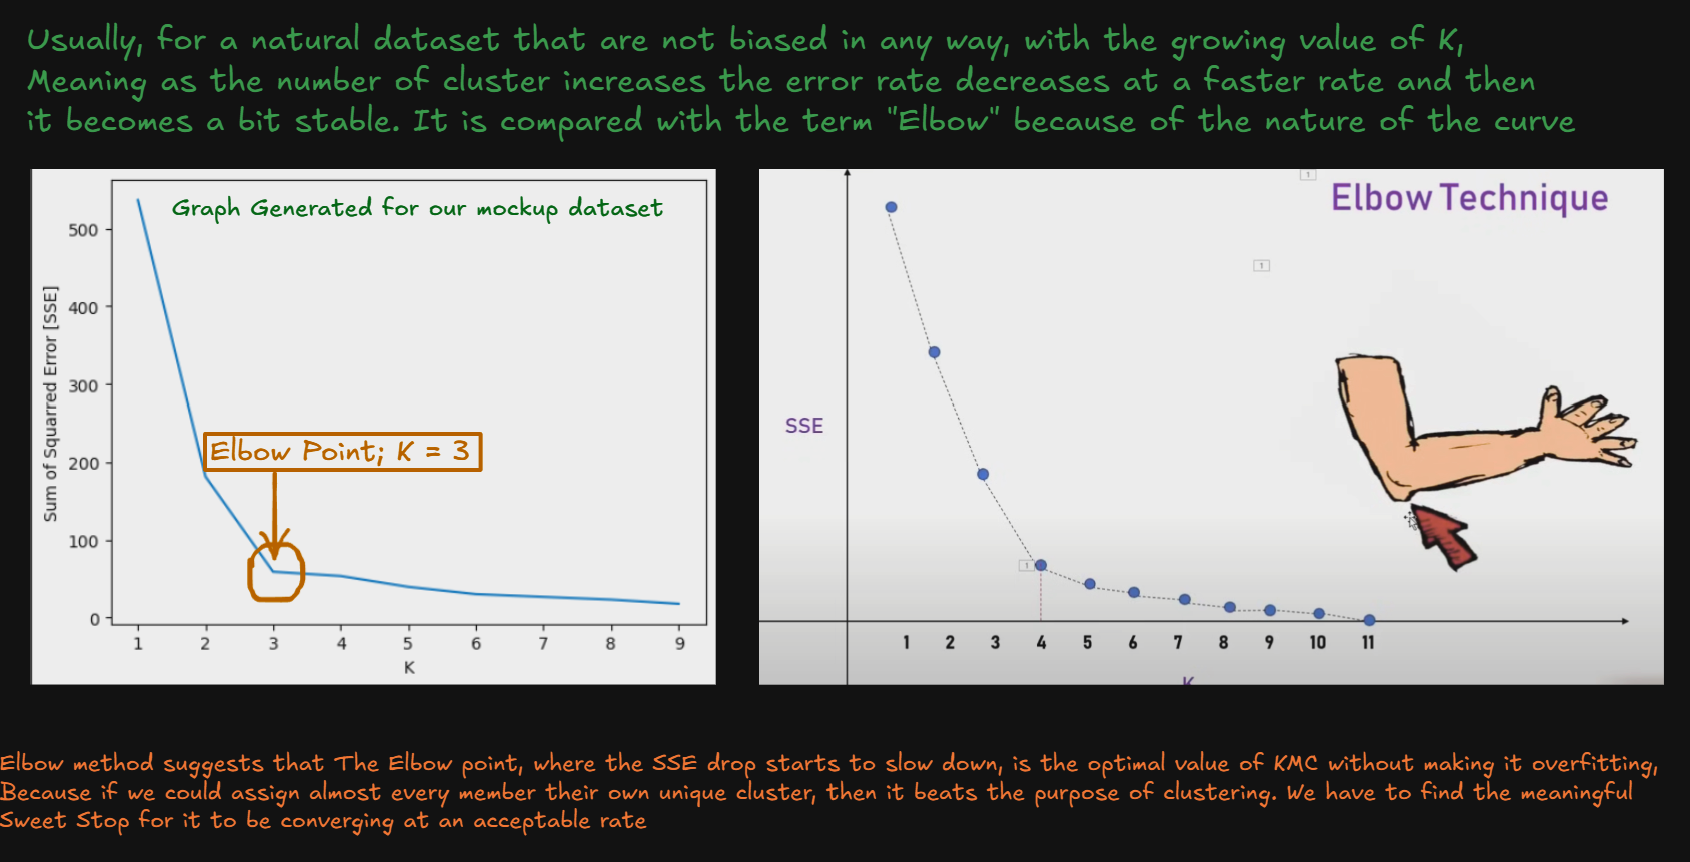

# **Observation**

You can see we are almost correct in making the grouping, Since the unsupervised approach do not have the Label data to compare the actual result with, so finding accuracy here will be a bit different, We have to use every permutation and combination to check if one predicted cluster correspondes to which original flower name group. But We can guage the effectiveness of the clusters by comparing the last two code cells above this.

Keep in mind we are only showing these examples in a 2D feature space for simplicity. The actual implementation with large feature spaces gets very complicated to visualize.


# **Learning Outcome**

* If a dataset has missing values in some features, we can use unsupervised learing (Clustering) to fillup the missing values in a meaningful way.

* During data annotation, unsupervised clustering is used to make meaingful classification of the data.

* Customer segmentation – grouping customers by purchasing behavior.

* Market basket analysis – finding product purchase patterns.

* Anomaly detection – identifying fraud or unusual patterns.

* Image compression – reducing image size using clustering.

* Topic modeling – grouping similar documents or texts.

* Recommendation systems – finding similar users/items without labels.